<a href="https://colab.research.google.com/github/Vishy-A/MachineLearningIntro/blob/main/4105HW4SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#Vishy Adusumilli
#801185663
#HW 4 Problem 2
import numpy as np
import pandas as pd
import seaborn as sns;
import matplotlib.pyplot as plt
from google.colab import drive
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Machine Learning/Datasets/Housing.csv'
dataset = pd.DataFrame(pd.read_csv(file_path))
dataset.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [11]:
varsnums = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
varsall = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
varstrings = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']


def binarymap(inp):
  return inp.map({'yes' : 1, 'no' : 0, })

dataset[varstrings] = dataset[varstrings].apply(binarymap)

np.random.seed(0)

dataset.pop('furnishingstatus')
dataset.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,1,0,0,0,1,2,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0


In [12]:
normalScaler  = MinMaxScaler()
dataset[varsnums] = normalScaler.fit_transform(dataset[varsnums])
dataset.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,1.000000,0.396564,0.6,0.333333,0.666667,1,0,0,0,1,0.666667,1
1,0.909091,0.502405,0.6,1.000000,1.000000,1,0,0,0,1,1.000000,0
2,0.909091,0.571134,0.4,0.333333,0.333333,1,0,1,0,0,0.666667,1
3,0.906061,0.402062,0.6,0.333333,0.333333,1,0,1,0,1,1.000000,1
4,0.836364,0.396564,0.6,0.000000,0.333333,1,1,1,0,1,0.666667,0


In [13]:
y = dataset.pop('price')
x = dataset.values


x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = .8, test_size = .2, random_state = 100)


kvals = range(1,12)



In [14]:
loss = []

for k in kvals:
  pca = PCA(n_components = k)
  trainpca = pca.fit_transform(x_train)
  testpca = pca.transform(x_test)

  svrmodel = SVR(C = 1)
  svrmodel.fit(trainpca, y_train)
  prediction = svrmodel.predict(testpca)

  loss.append(metrics.mean_squared_error(y_test, prediction, squared = True))



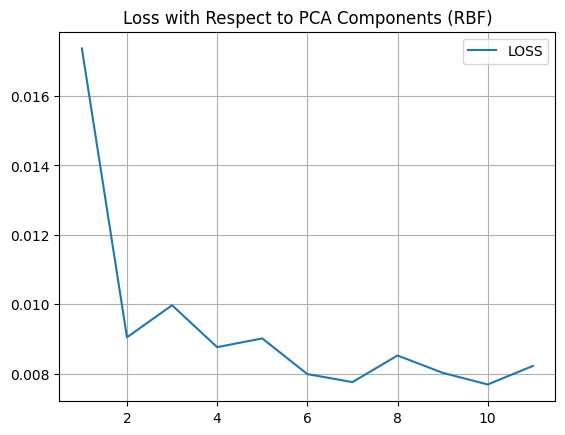

In [15]:
plt.plot(kvals, loss, label = 'LOSS')
plt.title("Loss with Respect to PCA Components (RBF)")
plt.legend()
plt.grid()

In [16]:
loss = []

for k in kvals:
  pca = PCA(n_components = k)
  trainpca = pca.fit_transform(x_train)
  testpca = pca.transform(x_test)

  svrmodel = SVR(kernel = 'sigmoid', C = 1)
  svrmodel.fit(trainpca, y_train)
  prediction = svrmodel.predict(testpca)

  loss.append(metrics.mean_squared_error(y_test, prediction, squared = True))


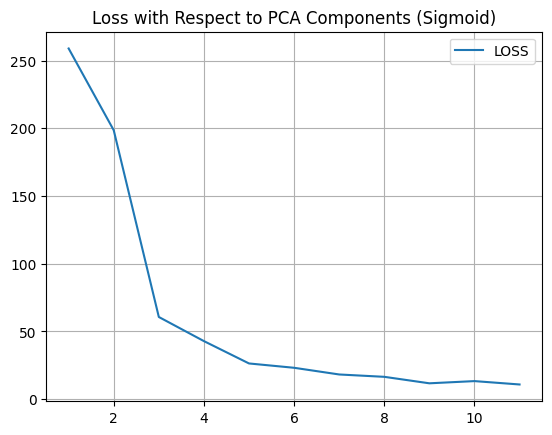

In [17]:
plt.plot(kvals, loss, label = 'LOSS')
plt.title("Loss with Respect to PCA Components (Sigmoid)")
plt.legend()
plt.grid()

In [18]:

loss = []

for k in kvals:
  pca = PCA(n_components = k)
  trainpca = pca.fit_transform(x_train)
  testpca = pca.transform(x_test)

  svrmodel = SVR(kernel = 'linear', C = 1)
  svrmodel.fit(trainpca, y_train)
  prediction = svrmodel.predict(testpca)

  loss.append(metrics.mean_squared_error(y_test, prediction, squared = True))

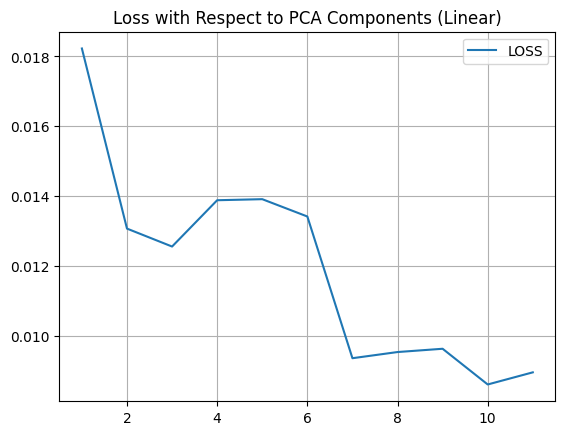

In [19]:
plt.plot(kvals, loss, label = 'LOSS')
plt.title("Loss with Respect to PCA Components (Linear)")
plt.legend()
plt.grid()